Dataset link = https://drive.google.com/drive/folders/1yko1IEdlXaT1pGdywyrZXIwsNusNN_y3?usp=drive_link

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')

In [5]:
from google.colab import files
uploaded = files.upload()

file_name = list(uploaded.keys())[0]



Saving apps.csv to apps (1).csv


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [9]:
df = pd.read_csv(file_name)
df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [10]:
df.drop(columns=['Unnamed: 0'], inplace=True)

df['Rating'].fillna(df['Rating'].median(), inplace=True)
df['Size'].fillna(df['Size'].median(), inplace=True)

df['Price'] = df['Price'].str.replace('$','').astype(float)
df['Installs'] = df['Installs'].str.replace('+','').str.replace(',','').astype(int)

df['Last Updated'] = pd.to_datetime(df['Last Updated'])


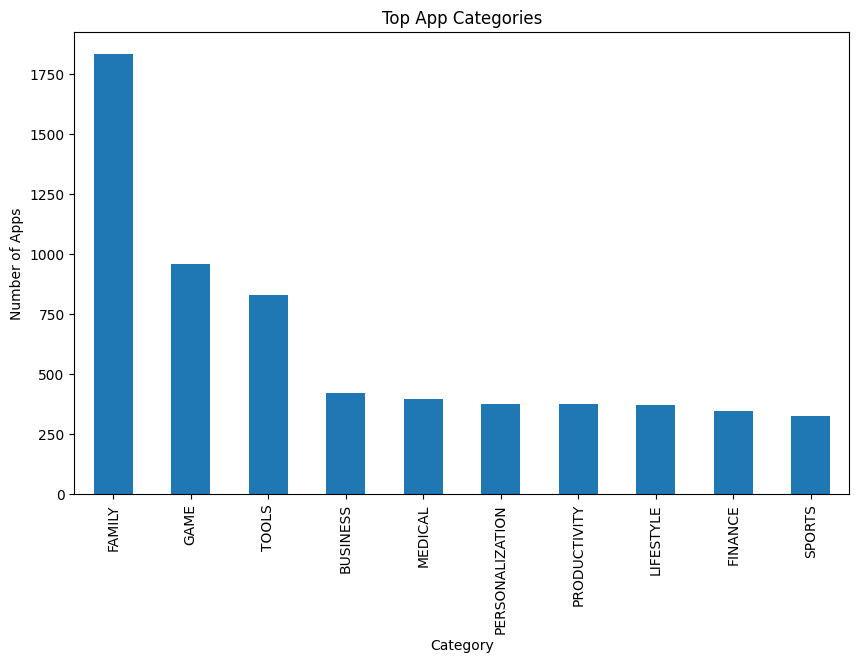

In [11]:
plt.figure(figsize=(10,6))
df['Category'].value_counts().head(10).plot(kind='bar')
plt.title("Top App Categories")
plt.xlabel("Category")
plt.ylabel("Number of Apps")
plt.show()


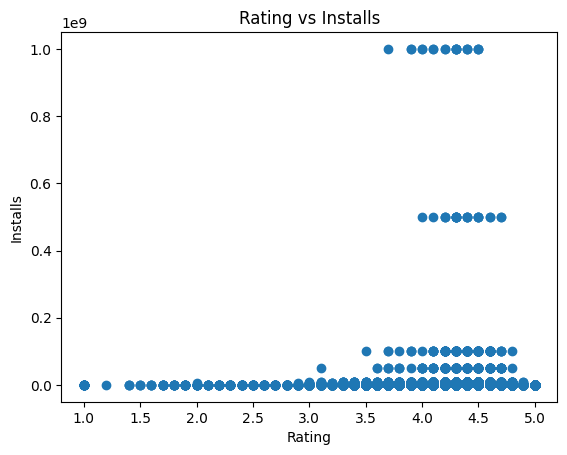

In [12]:
plt.scatter(df['Rating'], df['Installs'])
plt.xlabel("Rating")
plt.ylabel("Installs")
plt.title("Rating vs Installs")
plt.show()


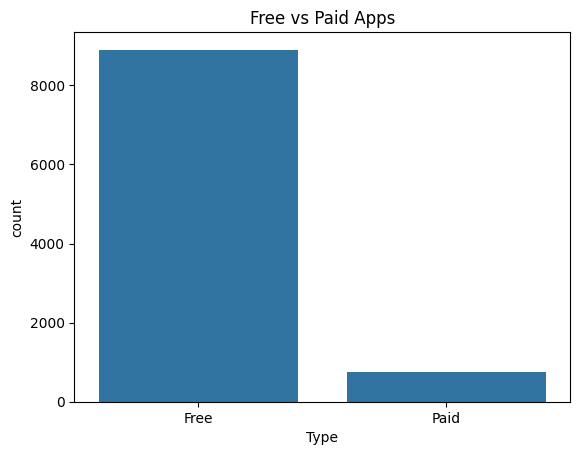

In [13]:
sns.countplot(x='Type', data=df)
plt.title("Free vs Paid Apps")
plt.show()


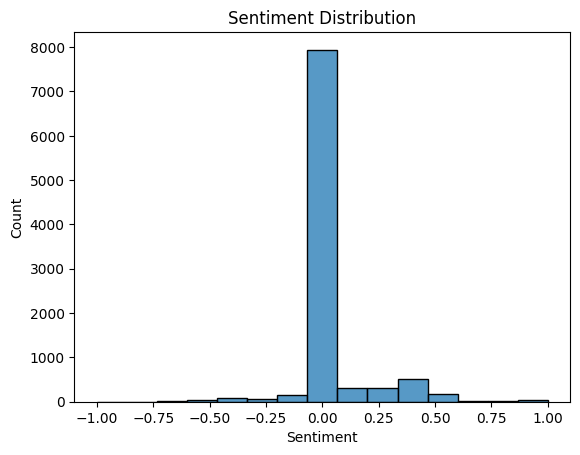

In [14]:
def sentiment(text):
    return TextBlob(text).sentiment.polarity

df['Sentiment'] = df['App'].apply(sentiment)

sns.histplot(df['Sentiment'])
plt.title("Sentiment Distribution")
plt.show()


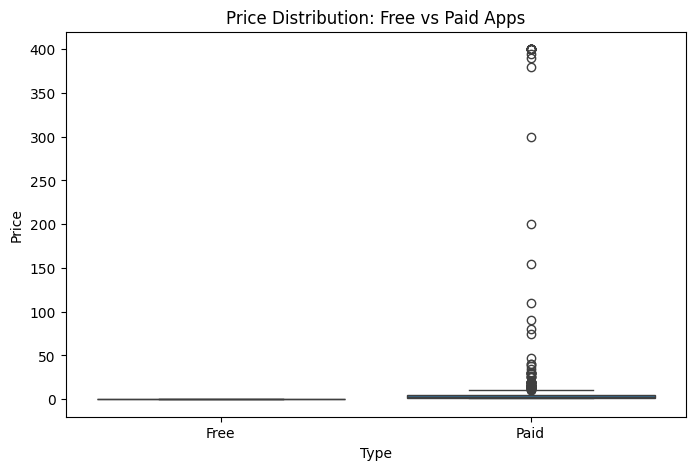

In [15]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Type', y='Price', data=df)
plt.title("Price Distribution: Free vs Paid Apps")
plt.show()


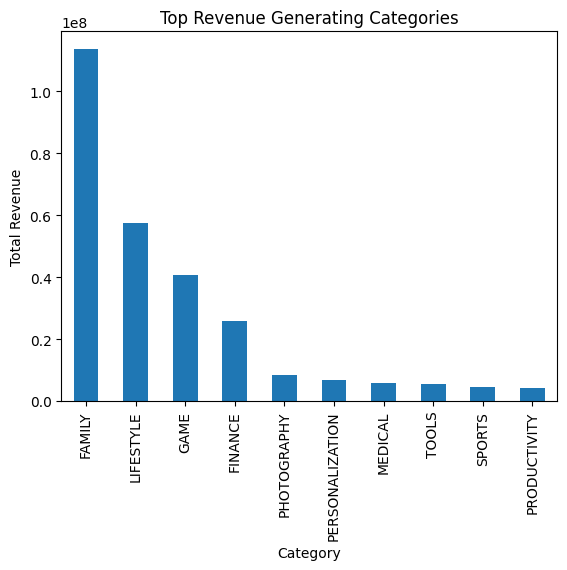

In [16]:
df['Revenue'] = df['Installs'] * df['Price']
top_revenue = df.groupby('Category')['Revenue'].sum().sort_values(ascending=False).head(10)

top_revenue.plot(kind='bar')
plt.title("Top Revenue Generating Categories")
plt.ylabel("Total Revenue")
plt.show()


**MARKET INSIGHTS**

 Most apps are Free; revenue mainly comes from a few Paid categories.
 Higher ratings lead to significantly more installs.
 Games and Family categories dominate the market.
 Positive sentiment correlates with higher popularity.

 **STRATEGY**

• Focus on high-revenue categories.
• Improve ratings to boost installs.
• Target monetization through premium features.